<a href="https://colab.research.google.com/github/yohanesnuwara/computational-geophysics/blob/master/seismic/seis_attribute_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attribute calculation of 3D seismic data

Notebook to demonstrate calculation of seismic attribute. Here, the Envelope attribute is calculated from a 3D seismic data in F3, Netherlands.

**Author:** Yohanes Nuwara

In [1]:
# Install, import packages, and clone repository
import numpy as np
import matplotlib.pyplot as plt

!pip install segyio
import segyio
import sys

!git clone https://github.com/yohanesnuwara/computational-geophysics
sys.path.append('/content/computational-geophysics/seismic')
sys.path.append('/content/computational-geophysics/seismic/attributes')

from seis_attribute import sliceAttribute, display_attribute
from seistool import openSegy3D, sliceCube

     |████████████████████████████████| 92kB 7.7MB/s 
Cloning into 'computational-geophysics'...
remote: Enumerating objects: 511, done.
remote: Counting objects: 100% (274/274), done.
remote: Compressing objects: 100% (272/272), done.
remote: Total 511 (delta 174), reused 0 (delta 0), pack-reused 237
Receiving objects: 100% (511/511), 37.58 MiB | 25.07 MiB/s, done.
Resolving deltas: 100% (295/295), done.


In [2]:
# Get access to data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read Data 3D

In [4]:
filename = '/content/drive/My Drive/Public geoscience Data/Dutch F3 seismic data/Dutch Government_F3_entire_8bit seismic.segy'

# Read Segy
cube = openSegy3D(filename)

Successfully read 

Inline range from 100 to 750
Crossline range from 300 to 1250
TWT from 4.0 to 1848.0
Sample rate: 4.0 ms
Survey rotation: 1.54 deg


In [5]:
# Retrieve amplitude data, inlines, xlines, and TWT
data = cube.data
inlines, crosslines, twt = cube.inlines, cube.crosslines, cube.twt

print(data)

[[[    0.     0.     0. ...  -685.  -569.     0.]
  [    0.     0.     0. ... -2683. -2175.   774.]
  [    0.     0.     0. ... -1588. -1499.   473.]
  ...
  [    0.     0.     0. ...  -971.  -832. -1247.]
  [    0.     0.     0. ... -1702. -1506. -1023.]
  [    0.     0.     0. ... -2689. -1088.   -31.]]

 [[    0.     0.     0. ...  -460.  -428.  1457.]
  [    0.     0.     0. ...    99. -1130.  -275.]
  [    0.     0.     0. ...  -635.  -609.  1149.]
  ...
  [    0.     0.     0. ...   -86. -1462. -2220.]
  [    0.     0.     0. ... -1173. -1277. -1643.]
  [    0.     0.     0. ... -1783. -1278.  -685.]]

 [[    0.     0.     0. ... -1178. -1158.  1350.]
  [    0.     0.     0. ...  -900.  -641.  1392.]
  [    0.     0.     0. ...  -790. -1096.  1002.]
  ...
  [    0.     0.     0. ...   -92.  -795. -2519.]
  [    0.     0.     0. ... -1199. -1624. -1742.]
  [    0.     0.     0. ... -2197. -1272.  -977.]]

 ...

 [[    0.     0.     0. ...     0.     0.     0.]
  [    0.     0.    

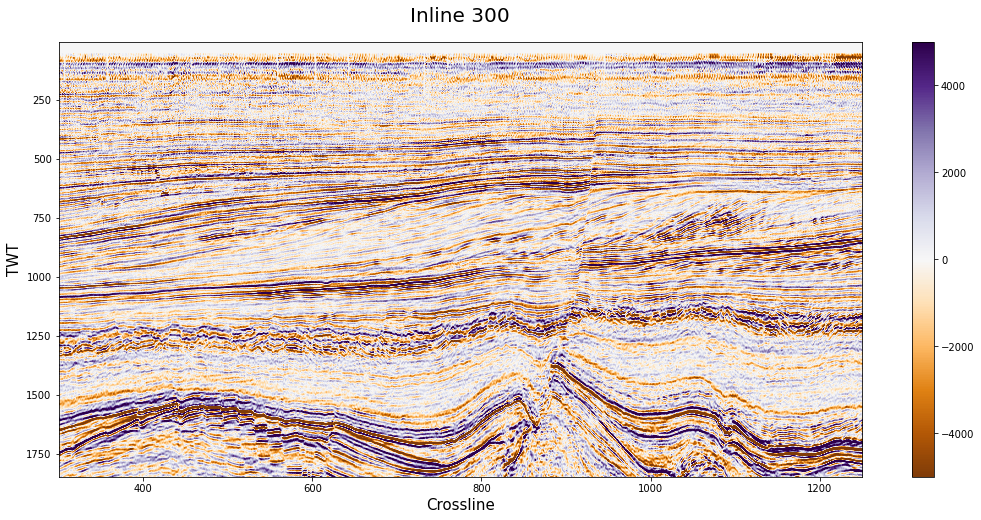

In [6]:
# Plot 2D slice
sliceCube(cube, 'il', inline_loc=300, display=True,
          cmap='PuOr', figsize=(18,8), vmin=-5000, vmax=5000)

## Seismic attribute calculation (output 2D)

### Inline 400

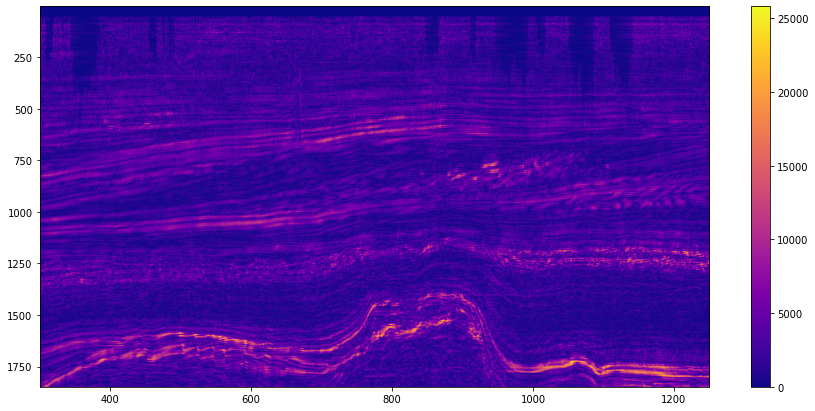

In [7]:
sliceAttribute(cube, output='2d', type='il', inline_loc=400,
               attribute_class='CompleTrace', attribute_type='enve',
               display=True, figsize=(15,7))

### Crossline 1200


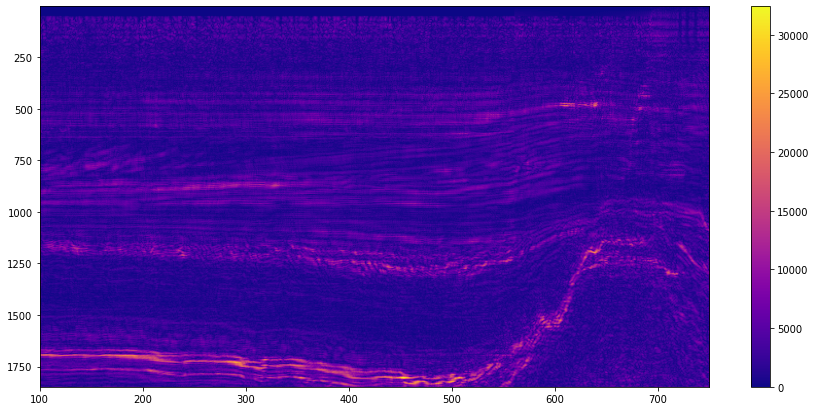

In [8]:
sliceAttribute(cube, output='2d', type='xl', xline_loc=1200,  
               attribute_class='CompleTrace', attribute_type='enve',
               display=True, figsize=(15,7))                  

### Timeslice 1624 ms

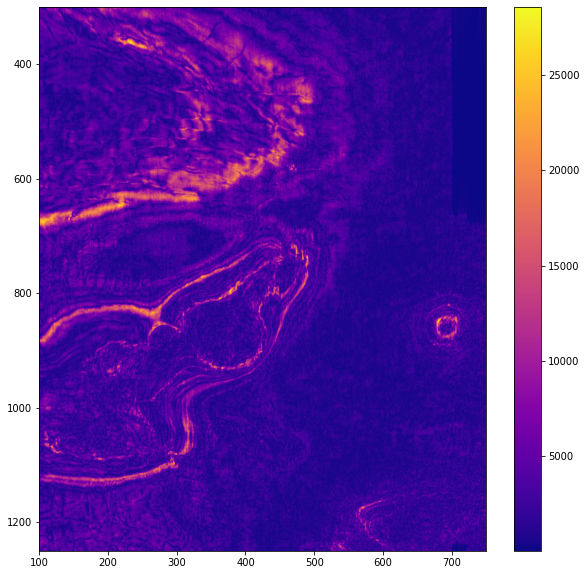

In [9]:
sliceAttribute(cube, output='2d', type='ts', timeslice_loc=1624, 
               attribute_class='CompleTrace', attribute_type='enve',
               display=True, figsize=(10,10))               

### Attributes grid (Complex trace class)

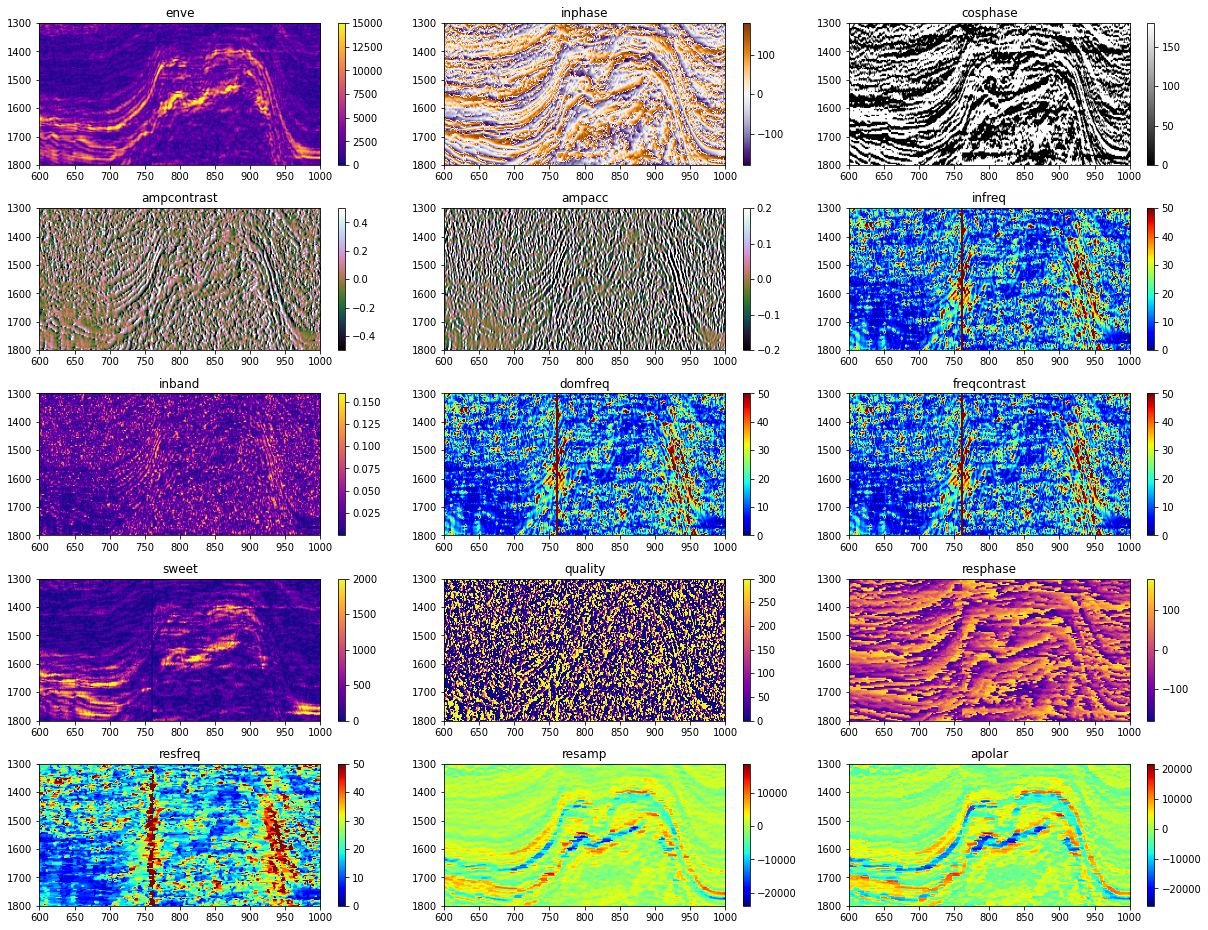

In [10]:
attributes = ['enve', 'inphase', 'cosphase', 'ampcontrast', 'ampacc', 
              'infreq', 'inband', 'domfreq', 'freqcontrast', 'sweet', 
              'quality', 'resphase', 'resfreq', 'resamp', 'apolar']

cmap = ['plasma', 'PuOr_r', 'gray', 'cubehelix', 'cubehelix',
        'jet', 'plasma', 'jet', 'jet', 'plasma',
        'plasma', 'plasma', 'jet', 'jet', 'jet']

vcol = [(0,15000), (None,None), (None,None), (-0.5,0.5), (-0.2,0.2),
        (0,50), (None,None), (0,50), (0,50), (0,2000),
        (0,300), (None,None), (0,50), (None,None), (None,None)]

plt.figure(figsize=(17,13))
for i in range(len(attributes)):
  # Compute attributes
  result = sliceAttribute(cube, output='2d', type='il', inline_loc=400,
                          attribute_class='CompleTrace', 
                          attribute_type=attributes[i])
  
  # Plot attributes
  plt.subplot(5,3,i+1)
  display_attribute(result, cube, 'il', cmap=cmap[i], vmin=vcol[i][0], vmax=vcol[i][1])
  plt.title(attributes[i])  

  # Zoom in the salt structure
  plt.xlim(600,1000)
  plt.ylim(1800,1300)

plt.tight_layout(1.01)

## Seismic attribute calculation (output 3D)

In [11]:
sliceAttribute(cube, output='3d', attribute_class='CompleTrace', attribute_type='enve')

dask.array<_trim, shape=(651, 951, 462), dtype=float32, chunksize=(650, 650, 462), chunktype=numpy.ndarray>